In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

%matplotlib inline

C:\Users\Jesse\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### **Task 6**: How many states cover 50% of US air traffic? 

In [2]:
data_path = 'C:/Users/Jesse/Desktop/midterm_data/data/'
flights_df = pd.read_csv(data_path + 'flights.csv')
flights_df.head()

C:\Users\Jesse\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2019-08-22,B6,B6,B6,984,B6,N281JB,984,14492,RDU,...,612,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-08-22,B6,B6,B6,987,B6,N978JB,987,10721,BOS,...,2611,39.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,2019-08-22,B6,B6,B6,988,B6,N983JT,988,12892,LAX,...,2611,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-08-22,B6,B6,B6,989,B6,N339JB,989,10721,BOS,...,399,18.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
4,2019-08-22,B6,B6,B6,990,B6,N583JB,990,13204,MCO,...,944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
state_codes = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

In [13]:
flights_df[['origin_city_name', 'dest_city_name']].head()

,origin_city_name,dest_city_name
0,"Raleigh/Durham, NC","Boston, MA"
1,"Boston, MA","Los Angeles, CA"
2,"Los Angeles, CA","Boston, MA"
3,"Boston, MA","Washington, DC"
4,"Orlando, FL","New York, NY"


In [3]:
flights_df['origin_state'] = flights_df['origin_city_name'].apply(lambda x: x.split(', ')[1])
flights_df['dest_state'] = flights_df['dest_city_name'].apply(lambda x: x.split(', ')[1])

In [4]:
flights_per_state = flights_df.groupby('origin_state')['fl_date'].count()

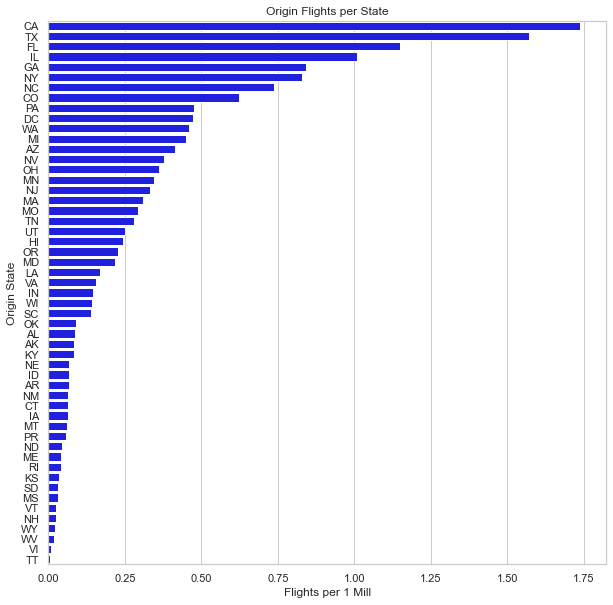

In [10]:
axis = plt.subplots(figsize=(10,10))

sns.set(style="whitegrid")
ax = sns.barplot(x=flights_per_state.sort_values(ascending=False)/1000000, y=flights_per_state.sort_values(ascending=False).index, color='blue')
ax.set(title='Origin Flights per State', xlabel='Flights per 1 Mill', ylabel='Origin State');

In [77]:
threshold = flights_per_state.sum()*0.5

states = []
total = 0
onemore = False

for state, num in flights_per_state.sort_values(ascending=False).items():
    
    
    if total <= threshold:
        states.append(state)
        total += num
    
    if total>threshold:
        onemore = True
    
    if onemore == True:
        break
        

print(f'{len(states)} states account for over 50% of the total Air traffic')
print('=====================')
print(f'Top {len(states)} states: ')
for state in states:
    print(state_codes[state])

8 states account for over 50% of the total Air traffic
Top 8 states: 
California
Texas
Florida
Illinois
Georgia
New York
North Carolina
Colorado


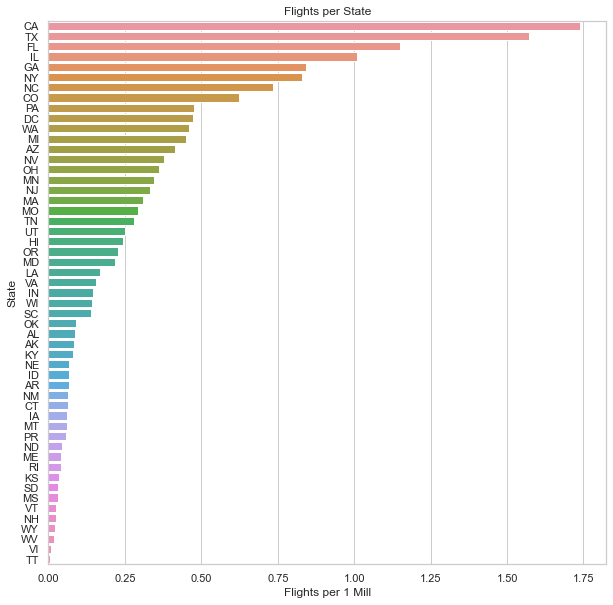

In [79]:
# Sorted by number of flights

axis = plt.subplots(figsize=(10,10))

sns.set(style="whitegrid")
ax = sns.barplot(x=flights_per_state.sort_values(ascending=False).values/1000000, y=flights_per_state.sort_values(ascending=False).index)
ax.set(title='Flights per State', xlabel='Flights per 1 Mill', ylabel='State');